# Exploratory Data Analysis on Data Breaches 💻

<img src="https://www.pnc.com/content/dam/pnc-thought-leadership/corporate-institutional/gain-market-insight/pnc_insights_ci_high-cost-security-breaches.jpg"  width="70%" height="30%">

## Introduction
In this digitally-driven society, technology has become an inseparable part of our daily lives for both individuals and companies. However, it has brought forth new challenges like data privacy concerns and cyber attacks like data breaches. Data breaches are on the rise, affecting thousands of companies of every size and costing billions of dollars in damages and legal consequences. Most importantly, individuals in the process, with their sensitive information being stolen to be used for malicious purposes. As technology continues to be an integral part of everyone's lives, data breaches continue to become a problem for businesses and users. 


## Objective
This project aims to identify characteristics and patterns of data breaches over time, such as breaching methods, targeted organizations, the amount of records compromised, and more.

## Dataset Information
This [dataset](https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list) was created by The Devastator, which has records from 2004 to 2022 and contains 352 rows and 7 columns. This includes data breaches of major organizations and breaches that resulted in 30,000 or more compromised records.

### Fields
- **Unnamed: 0** - the unique ID for each data breach incident.
- **Entity** - Name of the organization or incident.
- **Year** - Year the data breach occurred.
- **Records** - Number of records compromised during the data breach.
- **Organization type** - Type of organization the entity is.
- **Method** - Procedure used to initiate data breach.
- **Source** - Articles related to the data breach.

# <span style="background-color: #ace9ec">Step 0: Importing</span>

## Importing Libraries

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

## Importing the Data

In [261]:
df = pd.read_csv('/kaggle/input/data-breaches-a-comprehensive-list/df_1.csv')
df

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]
...,...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]


# <span style="background-color: #ace9ec">  Step 1: Understanding the Data  </span>

## Finding the number of rows and columns

In [262]:
df.shape

(352, 7)

## Top and Bottom 5 rows

In [263]:
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [264]:
df.tail()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
347,347,Zynga,2019,173000000,social network,hacked,[406][407]
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published,[408]
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security,[409]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]
351,351,IKEA,2022,95000,retail,accidentally published,[412]


## Data Types
So far, the 'Unnamed: 0' (or the Id column) is identified as an integer type and the rest of the columns are identified as object types.

In [265]:
df.dtypes

Unnamed: 0            int64
Entity               object
Year                 object
Records              object
Organization type    object
Method               object
Sources              object
dtype: object

## Descriptive Statistics
Since the 'Unnamed:0' column is the only column that is integer type, it will only show the descriptive statistics for that, even though it does not make sense. The Records column should be there, but it is an object type, so that will be fixed later.

In [266]:
df.describe()

,Unnamed: 0
count,352.000000
mean,175.500000
std,101.757883
min,0.000000
25%,87.750000
50%,175.500000
75%,263.250000
max,351.000000


## Checking the latest data
The latest data breach recorded in this dataset is 2022 with IKEA.

In [267]:
sorted_df = df.sort_values(by='Year', ascending=False)
sorted_df

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
351,351,IKEA,2022,95000,retail,accidentally published,[412]
151,151,International Committee of the Red Cross,2022,515000,humanitarian,unknown,[204][205][206]
350,350,50 companies and government institutions,2022,6400000,various,poor security,[410] [411]
148,148,Iberdrola,2022,1300000,energy,poor security,[200]
195,195,Morinaga Confectionery,2022,1648922,online shopping,ransomware hacked,[250]
...,...,...,...,...,...,...,...
91,91,DSW Inc.,2005,1400000,retail,hacked,[115]
29,29,Automatic Data Processing,2005,125000,financial,poor security,[42]
33,33,Bank of America,2005,1200000,financial,lost / stolen media,[46]
16,16,AOL,2004,92000000,web,"inside job, hacked",[28][29]


## Checking for NULL Values
In total, there are 5 records with NULL values: 2 empty Records, 1 empty Method, and 2 empty Sources. It will be helpful to identify the rows with NULL values. Thankfully, there is not a lot of null values so they can be removed later.

In [268]:
check_null = df.isnull().any(axis=1) # Checks if any rows in df have at least 1 null value
rows_with_nulls = df[check_null] # Shows all rows with null values
rows_with_nulls

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
40,40,Bethesda Game Studios,2018,NaN,gaming,accidentally published,[53]
69,69,Philippines Commission on Elections,2016,55000000,government,hacked,NaN
83,83,Democratic National Committee,2016,19252,political,NaN,[106]
192,192,Mobile TeleSystems (MTS),2019,100000000,telecommunications,misconfiguration/poor security,NaN
337,337,WordPress,2018,NaN,web service,hacked,[392]


## Check for Duplicate Values
There are some companies that have appeared more than once in the dataset, which would indicate that they have been breached more than once. All duplicates are listed below. To be sure, all rows in this data frame were checked individually to see if they are exact duplicates or not, to which there were none.

In [269]:
df.loc[df.duplicated(subset=['Entity'])]

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
17,17,AOL,2006,20000000,web,accidentally published,[30]
18,18,AOL,2014,2400000,web,hacked,[31]
24,24,AT&T,2010,114000,telecoms,hacked,[37]
36,36,Bell Canada,2018,100000,telecoms,hacked,[50]
40,40,Bethesda Game Studios,2018,NaN,gaming,accidentally published,[53]
63,63,Citigroup,2011,360083,financial,hacked,[84]
64,64,Citigroup,2013,150000,financial,poor security,[85]
72,72,Countrywide Financial Corp,2011,2500000,financial,inside job,[93]
111,111,Facebook,2018,50000000,social network,poor security,[140][141][142][143][144][145]
112,112,Facebook,2019,540000000,social network,poor security,[146][147]


### Checking an example: Facebook
Facebook has had 5 different data breaches between the years 2004-2023, with 3 separate breaches occurring in 2019.

In [270]:
df.query('Entity == "Facebook"')

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
110,110,Facebook,2013,6000000,social network,accidentally published,[139]
111,111,Facebook,2018,50000000,social network,poor security,[140][141][142][143][144][145]
112,112,Facebook,2019,540000000,social network,poor security,[146][147]
113,113,Facebook,2019,1500000,social network,accidentally uploaded,[148]
114,114,Facebook,2019,267000000,social network,poor security,[149][150]


## Unique Values and Counts of All Columns

### Unique Years
Towards the end of this data frame, it is seen that there are three companies that had a data breach that spanned across two years, such as '2019-2020,' '2018-2019,' and '2014 and 2015.'

In [271]:
year_counts = df['Year'].value_counts()
print(year_counts.to_string())

2011             34
2020             31
2019             30
2015             28
2013             28
2018             26
2014             25
2012             23
2016             22
2010             19
2008             16
2021             13
2009             13
2007             12
2017              9
2006              7
2005              6
2022              5
2004              2
2019-2020         1
2018-2019         1
2014 and 2015     1


### Unique Records
When this data frame is fully printed, it can be seen that there are a lot of values that do not have the number of records, but rather will say something like "unknown," "G20 World Leaders," "19 years of data," and such.

In [272]:
records_counts = df['Records'].value_counts()
records_counts

unknown      21
1500000       7
1000000       6
500000        6
160000        4
             ..
201000000     1
7000000       1
9000000       1
25000         1
95000         1
Name: Records, Length: 255, dtype: int64

In [273]:
non_int_rec = pd.to_numeric(df['Records'], errors='coerce') #Checking for all non-integer values
non_int_rec = non_int_rec.isnull()
rows_non_int = df[non_int_rec]
rows_non_int.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
10,10,Amazon Japan G.K.,2019,unknown,web,accidentally published,[20][21]
25,25,Atraf,2021,unknown,dating,hacked,[38]
27,27,Australian Immigration Department,2015,G20 world leaders,government,accidentally published,[40]
28,28,Australian National University,2019,19 years of data,academic,hacked,[41]
34,34,Barnes & Noble,2012,63 stores,retail,hacked,[47][48]


### Unique Organization Types
This is an extensive list of all the unique organization types throughout the dataset. There are some things to take note, such as the fact that some of these types sound too similar to each other. For example, 'gaming,' 'game,' and 'web, gaming' sound very similar to each other. What would be helpful is to combine some organization types together to make things easier. Another note is the 'web' organization type, which includes a variety of websites of various genres. All of these companies could be recategorized into another organization type since 'web' seems too broad.

In [274]:
org_counts = df['Organization type'].value_counts()
print(org_counts.to_string())

web                                                                         53
healthcare                                                                  47
financial                                                                   38
government                                                                  30
retail                                                                      27
tech                                                                        19
academic                                                                    13
telecoms                                                                    12
gaming                                                                      12
social network                                                               8
hotel                                                                        8
transport                                                                    7
military                                            

In [275]:
web_orgs = df[df['Organization type'] == 'web']
web_orgs.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
10,10,Amazon Japan G.K.,2019,unknown,web,accidentally published,[20][21]
12,12,Ancestry.com,2021,300000,web,poor security,[23]
16,16,AOL,2004,92000000,web,"inside job, hacked",[28][29]
17,17,AOL,2006,20000000,web,accidentally published,[30]
18,18,AOL,2014,2400000,web,hacked,[31]


### Unique Methods
Interesting to see is that there are some companies that were breached by two different methods. For example, 2 companies were breached due to both poor security and an inside job. Another company had poor security and was therefore hacked. There is also inconsistent formatting in this column as there is 1 row that has 'Poor security' and several rows that have 'poor security,' which makes them treated as different methods when they should be the same.

In [276]:
method_counts = df['Method'].value_counts()
print(method_counts)

hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

# <span style="background-color: #ace9ec">  Step 2: Data Preparation  </span>

## Removing Unnecessary Columns
The only column that can be dropped is the 'Sources' column since it is not going to be very useful for analysis. This should also allow us to still keep the two rows that had a NULL value in the 'Sources' column.

In [277]:
df.drop(columns='Sources', inplace=True)
df

,Unnamed: 0,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,350,50 companies and government institutions,2022,6400000,various,poor security


## Removing Null Values
Since there are only 3 records with null values, it will be okay to remove them from the dataset and it will not impede on the results.

In [278]:
df = df.dropna()
df

,Unnamed: 0,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,350,50 companies and government institutions,2022,6400000,various,poor security


In [279]:
df.isna().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              0
Organization type    0
Method               0
dtype: int64

No more NULL values!

## Preparing the ID Column
### Change 'Unnamed: 0' to 'Id'
This was done to make more sense.

In [280]:
df = df.rename(columns={'Unnamed: 0':'Id'})
df

,Id,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,350,50 companies and government institutions,2022,6400000,various,poor security


## Preparing the Years Columns
### Changing Year Ranges
Remember that there were some values that had "2019-2020", "2018-2019", and "2014-2015" under the 'Year' column. These rows will be replaced with the year it started. For example, instead of having it as "2019-2020," it wil be "2019" instead.

In [281]:
year_change = df[(df['Year'] == '2019-2020') | (df['Year'] == '2018-2019') | (df['Year'] == '2014 and 2015')]
year_change

,Id,Entity,Year,Records,Organization type,Method
94,94,EasyJet,2019-2020,"9,000,000 (approx) - basic booking, 2208 (cred...",transport,hacked
96,96,"Earl Enterprises(Buca di Beppo, Earl of Sandwi...",2018-2019,2000000,restaurant,hacked
144,144,Hilton Hotels,2014 and 2015,363000,hotel,hacked


In [282]:
df.loc[df['Year'] == '2019-2020', 'Year'] = '2019'
df.loc[df['Year'] == '2018-2019', 'Year'] = '2018'
df.loc[df['Year'] == '2014 and 2015', 'Year'] = '2014'

### Converting Years to Date Type

In [283]:
df['Year'] = pd.to_datetime(df['Year'])
df['Year'] = df['Year'].dt.year
df

,Id,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
347,347,Zynga,2019,173000000,social network,hacked
348,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
349,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
350,350,50 companies and government institutions,2022,6400000,various,poor security


In [284]:
year_counts = df['Year'].value_counts()
year_counts

2011    34
2019    31
2020    31
2015    28
2013    28
2014    26
2018    25
2012    23
2016    21
2010    19
2008    16
2021    13
2009    13
2007    12
2017     9
2006     7
2005     6
2022     5
2004     2
Name: Year, dtype: int64

## Preparing the Records Column
### Identifying the columns that are string type 

There are 45 rows that are not in integer format. This includes all rows that say 'unknown,' '# locations,' and '# GB,' and anything else that is not about the number of records comrpomised. There are some rows where it does say the amount of records but is written with commas (ex: 'over 5,000,000') and there are some rows that have had records stolen, but is not specific (ex: 'millions').

In [285]:
num_records = pd.to_numeric(df['Records'], errors='coerce')
check_non_integers = num_records.isnull()
rows_non_int = df[check_non_integers]
rows_non_int

,Id,Entity,Year,Records,Organization type,Method
10,10,Amazon Japan G.K.,2019,unknown,web,accidentally published
25,25,Atraf,2021,unknown,dating,hacked
27,27,Australian Immigration Department,2015,G20 world leaders,government,accidentally published
28,28,Australian National University,2019,19 years of data,academic,hacked
34,34,Barnes & Noble,2012,63 stores,retail,hacked
41,41,Betsson Group,2020,unknown,gambling,unknown
47,47,British Airways,2015,tens of thousands,retail,hacked
48,48,2019 Bulgarian revenue agency hack,2019,"over 5,000,000",government,hacked
66,66,Clearview AI,2020,unknown (client list),information technology,hacked
76,76,CVS,2015,millions,retail,hacked


In [286]:
# number of rows that are not integers
rows_non_int.shape

(45, 6)

### Changing Rows to an Appropriate Format

In [287]:
string_rec = df[(df['Entity'] == '2019 Bulgarian revenue agency hack')|(df['Entity'] == 'EasyJet')]
string_rec

,Id,Entity,Year,Records,Organization type,Method
48,48,2019 Bulgarian revenue agency hack,2019,"over 5,000,000",government,hacked
94,94,EasyJet,2019,"9,000,000 (approx) - basic booking, 2208 (cred...",transport,hacked


In [288]:
df.loc[df['Records'] == 'over 5,000,000', 'Records'] = '5000000'
df.loc[df['Records'] == '9,000,000 (approx) - basic booking, 2208 (credit card details)', 'Records'] = '9000000'

### Removing Rows That are Not Records or Not Specific

In [289]:
num_records = pd.to_numeric(df['Records'], errors='coerce')
check_non_integers = num_records.isnull()
rows_non_int = df[check_non_integers]
df.drop(rows_non_int.index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Id,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,healthcare,hacked
1,1,500px,2020,14870304,social networking,hacked
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked
4,4,Adobe Inc.,2019,7500000,tech,poor security
...,...,...,...,...,...,...
301,347,Zynga,2019,173000000,social network,hacked
302,348,Unknown agency(believed to be tied to United S...,2020,200000000,financial,accidentally published
303,349,National Health Information Center (NCZI) of S...,2020,391250,healthcare,poor security
304,350,50 companies and government institutions,2022,6400000,various,poor security


### Changing Data Type to Integer
When checking the data types, the 'Records' and 'Year' columns should now be integer types.

In [290]:
df['Records'] = df['Records'].astype('Int64')
df.dtypes

Id                    int64
Entity               object
Year                  int64
Records               Int64
Organization type    object
Method               object
dtype: object

## Describing the Data Again
Now that Year and Records have been converted to date/integer types, descriptive statistics can now be calculated.

In [291]:
df.describe()

,Id,Year,Records
count,306.000000,306.000000,306.0
mean,175.437908,2013.771242,43700367.313725
std,102.071741,4.492612,192678923.310089
min,0.000000,2004.000000,6700.0
25%,89.250000,2011.000000,345934.25
50%,175.000000,2013.000000,1900000.0
75%,263.750000,2018.000000,17750000.0
max,351.000000,2022.000000,3000000000.0


## Preparing the Organization Type Column

### Combining Organization Types
Organization types that can be combined:

- **Healthcare and Medical**: 'healthcare', 'Clinical Laboratory', 'health', 'hospital', 'government, healthcare', 'military, healthcare'
- **Technology and Tech-related**: 'tech', 'Tech', 'tech, retail', 'web, military', 'phone accessories', 'online marketing', 'mobile carrier', 'hosting provider', 'data broker', 'messaging app', 'QR code payment'
- **Telecommunications**: 'telecommunications', 'telecoms', 'telecom', 'Telephone directory'
- **Financial and Banking**: 'financial', 'financial, credit reporting', 'banking', 'financial service company'
- **Retail and Shopping**: 'retail', 'online shopping', 'fashion', 'shopping', 'ticket distribution'
- **Government**: 'government', 'government, database', 'special public corporation'
- **Military**: 'military', 'government, military'
- **Social Media and Networking**: 'social networking', 'social network', 'social media'
- **Education and Academic**: 'educational services', 'academic'
- **Entertainment**: 'gaming', 'game', 'web, gaming'
- **Media**: 'media', 'local search', 'publisher (magazine)', 'tech, web'
- **Advertising and Marketing**: 'advertising', 'market analysis'

The rest of the organization types, such as 'genealogy' will be its own category, but the format will be changed to be capitalized just for consistency purposes.

In [292]:
# Healthcare and Medical
healthcare_medical = ['healthcare', 'Clinical Laboratory', 'health', 'hospital', 'government, healthcare', 'military, healthcare']
mask = df['Organization type'].isin(healthcare_medical)
df.loc[mask, 'Organization type'] = 'Healthcare and Medical'
# Technology and Tech-related
tech_related = ['tech', 'Tech', 'tech, retail', 'web, military', 'phone accessories', 'online marketing', 'mobile carrier', 'hosting provider', 'data broker', 'messaging app', 'QR code payment']
mask = df['Organization type'].isin(tech_related)
df.loc[mask, 'Organization type'] = 'Technology and Tech-Related'
# Telecommunications
telecomm = ['telecommunications', 'telecoms', 'telecom', 'Telephone directory']
mask = df['Organization type'].isin(telecomm)
df.loc[mask, 'Organization type'] = 'Telecommunications'
# Financial and Banking
fin_banking = ['financial', 'financial, credit reporting', 'banking', 'financial service company']
mask = df['Organization type'].isin(fin_banking)
df.loc[mask, 'Organization type'] = 'Financial and Banking'
# Retail and Shopping
retail_shop = ['retail', 'online shopping', 'fashion', 'shopping', 'ticket distribution', 'Consumer Goods']
mask = df['Organization type'].isin(retail_shop)
df.loc[mask, 'Organization type'] = 'Retail and Shopping'
# Government
govt = ['government', 'government, database', 'special public corporation']
mask = df['Organization type'].isin(govt)
df.loc[mask, 'Organization type'] = 'Government'
# Military
military = ['military', 'government, military']
mask = df['Organization type'].isin(military)
df.loc[mask, 'Organization type'] = 'Military'
# Social Media and Networking
social_media = ['social networking', 'social network', 'social media', 'web, tech']
mask = df['Organization type'].isin(social_media)
df.loc[mask, 'Organization type'] = 'Social Media and Networking'
# Education and Academic
education = ['educational services', 'academic']
mask = df['Organization type'].isin(education)
df.loc[mask, 'Organization type'] = 'Education and Academic'
# Entertainment
entertainment = ['gaming', 'game', 'web, gaming', 'gambling']
mask = df['Organization type'].isin(entertainment)
df.loc[mask, 'Organization type'] = 'Entertainment'
# Media
media = ['media', 'local search', 'publisher (magazine)', 'tech, web']
mask = df['Organization type'].isin(media)
df.loc[mask, 'Organization type'] = 'Media'
# Advertising and Marketing
ad_market = ['advertising', 'market analysis']
mask = df['Organization type'].isin(ad_market)
df.loc[mask, 'Organization type'] = 'Advertising and Marketing'
# Energy, Genealogy, Background Check, Restaurant, Hospitality, Various/Unknown -- Making Capitalization Consistent
df['Organization type'] = df['Organization type'].replace('energy','Energy')
df['Organization type'] = df['Organization type'].replace('genealogy','Genealogy')
df['Organization type'] = df['Organization type'].replace('background check','Background Check')
df['Organization type'] = df['Organization type'].replace('restaurant','Restaurant')
df['Organization type'] = df['Organization type'].replace('hotel','Hospitality')
df['Organization type'] = df['Organization type'].replace('various','Various/Unknown')
df['Organization type'] = df['Organization type'].replace('humanitarian','Humanitarian')
df['Organization type'] = df['Organization type'].replace('transport','Transport')

df['Organization type'].value_counts()

Healthcare and Medical                                                      51
web                                                                         49
Financial and Banking                                                       39
Government                                                                  30
Retail and Shopping                                                         26
Technology and Tech-Related                                                 24
Telecommunications                                                          16
Education and Academic                                                      13
Entertainment                                                               12
Social Media and Networking                                                 12
Military                                                                     7
Transport                                                                    6
Media                                               

### Recategorizing organization types
Below are all of the unique Entities (organizations) that are under the 'web' category. All of these organizations are going to be recategorized in a more appropriate and specific organization type. Also notice from the list above that there was an organization type that says 'personal and demographic data about residents and their properties of US.' This value will be shortened to just 'Properties.' 

In [293]:
webs = df[df['Organization type'] == 'web']
webs['Entity'].unique()

array(['Ancestry.com', 'AOL', 'Ashley Madison', 'Auction.co.kr',
       'Betfair', 'Canva', 'China Software Developer Network',
       'Chinese gaming websites (three: Duowan, 7K7K, 178.com)',
       "Domino's Pizza (France)", 'DoorDash', 'Dropbox', 'Drupal', 'eBay',
       'Evernote', 'Friend Finder Networks', 'Funimation', 'Formspring',
       'Gamigo', 'Gawker', 'Gmail', 'KM.RU',
       'LinkedIn, eHarmony, Last.fm', 'Living Social', 'MacRumors.com',
       'Monster.com', 'Mozilla', 'Nexon Korea Corp', 'Orbitz', 'Patreon',
       'Rakuten', 'Rambler.ru', 'Scribd', 'Sony Pictures', 'Steam',
       'Taringa!', 'TaxSlayer.com', 'Tianya Club', 'Tumblr', 'Twitter',
       'Wattpad', 'Weebly', 'Writerspace.com', 'Xat.com', 'Yahoo',
       'Yahoo! Voices', 'Zappos'], dtype=object)

In [294]:
df.loc[df['Entity'] == 'Ancestry.com', 'Organization type'] = 'Genealogy'
df.loc[df['Entity'] == 'AOL', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Steam', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Nexon Korea Corp', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Rakuten', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'Scribd', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Sony Pictures', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'TaxSlayer.com', 'Organization type'] = 'Financial and Banking'
df.loc[df['Entity'] == 'Taringa!', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Tumblr', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Twitter', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Wattpad', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Ashley Madison', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Betfair', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Friend Finder Networks', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Funimation', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Gamigo', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Zappos', 'Organization type'] = 'Retail and Shopping'
df.loc[df['Entity'] == 'Auction.co.kr', 'Organization type'] = 'Retail and Shopping'
df.loc[df['Entity'] == 'Canva', 'Organization type'] = 'Graphic Design and Web Development'
df.loc[df['Entity'] == 'China Software Developer Network', 'Organization type'] = 'Media'
df.loc[df['Entity'] == 'Chinese gaming websites (three: Duowan, 7K7K, 178.com)', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == "Domino's Pizza (France)", 'Organization type'] = 'Restaurant'
df.loc[df['Entity'] == 'DoorDash', 'Organization type'] = 'Restaurant'
df.loc[df['Entity'] == 'Dropbox', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'Drupal', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'eBay', 'Organization type'] = 'Retail and Shopping'
df.loc[df['Entity'] == 'Evernote', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'Formspring', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Gawker', 'Organization type'] = 'Media'
df.loc[df['Entity'] == 'Gmail', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'KM.RU', 'Organization type'] = 'Media'
df.loc[df['Entity'] == 'LinkedIn, eHarmony, Last.fm', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Living Social', 'Organization type'] = 'Retail and Shopping'
df.loc[df['Entity'] == 'MacRumors.com', 'Organization type'] = 'Media'
df.loc[df['Entity'] == 'Monster.com', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Mozilla', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'Orbitz', 'Organization type'] = 'Traveling'
df.loc[df['Entity'] == 'Patreon', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Rambler.ru', 'Organization type'] = 'Technology and Tech-Related'
df.loc[df['Entity'] == 'Tianya Club', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Weebly', 'Organization type'] = 'Graphic Design and Web Development'
df.loc[df['Entity'] == 'Writerspace.com', 'Organization type'] = 'Entertainment'
df.loc[df['Entity'] == 'Xat.com', 'Organization type'] = 'Social Media and Networking'
df.loc[df['Entity'] == 'Yahoo', 'Organization type'] = 'Media'
df.loc[df['Entity'] == 'Yahoo! Voices', 'Organization type'] = 'Media'

df.loc[df['Organization type'] == 'personal and demographic data about residents and their properties of US','Organization type'] = 'Properties'

In [295]:
df.head()

,Id,Entity,Year,Records,Organization type,Method
0,0,21st Century Oncology,2016,2200000,Healthcare and Medical,hacked
1,1,500px,2020,14870304,Social Media and Networking,hacked
2,2,Accendo Insurance Co.,2020,175350,Healthcare and Medical,poor security
3,3,Adobe Systems Incorporated,2013,152000000,Technology and Tech-Related,hacked
4,4,Adobe Inc.,2019,7500000,Technology and Tech-Related,poor security


Recategorizing these entities also led to creating new categories. For example, Canva and Weebly are under the 'Graphic Design and Web Development' category, which did not exist before.

## Preparing the Methods Column
'Poor security' and 'poor security' need to be combined.

In [296]:
df['Method'] = df['Method'].replace('Poor security','poor security')

df['Method'].unique()

array(['hacked', 'poor security', 'lost / stolen media',
       'inside job, hacked', 'accidentally published',
       'lost / stolen computer', 'unsecured S3 bucket', 'unknown',
       'inside job', 'accidentally uploaded', 'poor security / hacked',
       'unprotected api', 'poor security/inside job',
       'data exposed by misconfiguration', 'intentionally lost',
       'misconfiguration/poor security', 'ransomware hacked',
       'rogue contractor', 'improper setting, hacked',
       'publicly accessible Amazon Web Services (AWS) server',
       'accidentally exposed', 'social engineering'], dtype=object)

# <span style="background-color: #ace9ec">  Step 3: Relationships  </span>

## Year vs. Frequency of Data Breaches, Year vs. Number of Compromised Records

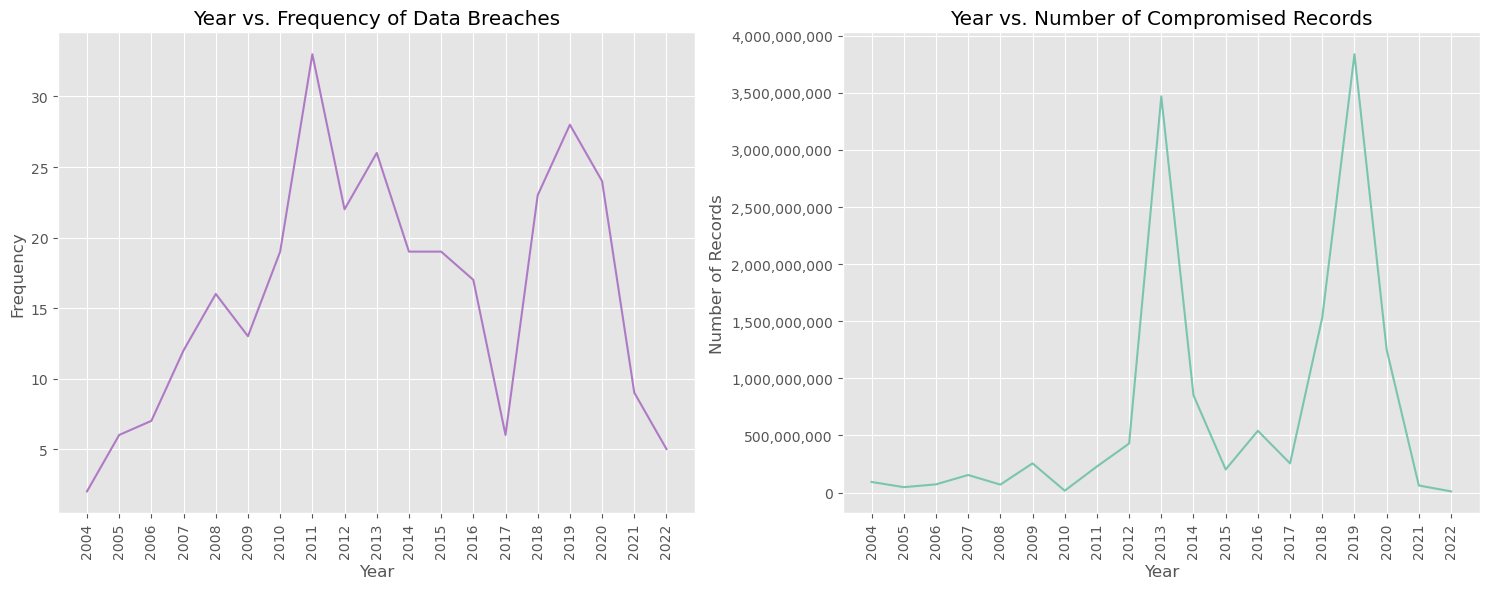

In [297]:
fig, (c1, c2) = plt.subplots(1, 2, figsize=(15,6))
# Number of Data Breaches Every Year
count_breach = df.groupby('Year')['Entity'].count()
c1.plot(count_breach.index, count_breach, color="#AF7AC5")
c1.set_title('Year vs. Frequency of Data Breaches')
c1.set_xlabel('Year')
c1.set_ylabel('Frequency')
years_range = range(2004, 2023) # To prevent the years from being in decimal format in the graph
c1.set_xticks(years_range)
c1.set_xticklabels(years_range, rotation=90)

# Number of Records Stolen Every Year
sum_rec = df.groupby('Year')['Records'].sum()
c2.plot(sum_rec.index, sum_rec, color="#7AC5AF")
c2.set_title('Year vs. Number of Compromised Records')
c2.set_xlabel('Year')
c2.set_ylabel('Number of Records')
years_range = range(2004, 2023)
c2.set_xticks(years_range)
c2.set_xticklabels(years_range, rotation=90)
c2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

### Insights
1. **There is a gradual increase of data breaches occurring in 2004-2008**. A probable reason for this is due to the growth of the Internet, with more people and businesses connecting to it. The importance of security infrastructure was not much of importance during this time, so it was easier for hackers to infiltrate companies digitally. 2009 shows a decrease of breaches, which may show that more companies started implementing security measures to protect their assets. This was also the 2008 recession, so that is another thing to keep in mind when observing this increase.

These articles from 2008 and 2009 support this insight:
- [Discusses the increase in data breaches in 2008](https://redmondmag.com/articles/2008/07/02/data-breaches-up-in-first-half-of-2008.aspx)
- [Discusses the drop in data breaches in 2009 from 2008](https://www.forbes.com/2009/11/24/security-hackers-data-technology-cio-network-breaches.html)
2. **The frequency of data breaches was at an all-time-high in 2011**. This could suggest that despite increased security efforts, there has been a change in data breaching and hacking methods.
3. **The trend is highly fluctuating**. The different peaks and valleys throughout this line graph would imply that there has been constant shifts in cybersecurity efforts and the evolution of data breaching and hacking methods.
4. **There is a peak between 2018-2020**. Peaks during this time was partly due to the COVID-19 pandemic and lockdown where more people spent more time on the Internet and companies expanded their online businesses. Another suggestion would be the rise of Artificial Intelligence making data breach methods more efficient and work against security.
5. **There are two extreme peaks in 2013 and 2019 where over billions of records were stolen.** This suggests that during these years, there were some huge data breaches that occurred where over hundred millions of records were stolen. This can be seen if we look at a list of all the breaches that happened in these years. Below are the data frames of breaches that happened in 2013 and 2019, which include the entity, records, and year. Extremely large quantities of records are shown, with the 2013 Yahoo data breach reaching 3,000,000,000 records and the 2019 First American Corporation data breach reaching 885,000,000 records.

**2013**

In [298]:
count_breach = df[df['Year'] == 2013]
count_breach[['Entity','Records','Year']].sort_values(by='Records', ascending=False).head()

,Entity,Records,Year
294,Yahoo,3000000000,2013
3,Adobe Systems Incorporated,152000000,2013
234,Target Corporation,110000000,2013
250,Tumblr,65469298,2013
91,Evernote,50000000,2013


**2019**

In [299]:
count_breach = df[df['Year'] == 2019]
count_breach[['Entity','Records','Year']].sort_values(by='Records', ascending=False).head()

,Entity,Records,Year
103,First American Corporation,885000000,2019
97,Facebook,540000000,2019
8,Airtel,320000000,2019
249,Truecaller,299055000,2019
167,MongoDB,275000000,2019


## Organization Type vs. Frequency of Data Breaches, Organization Type vs. Number of Compromised Records

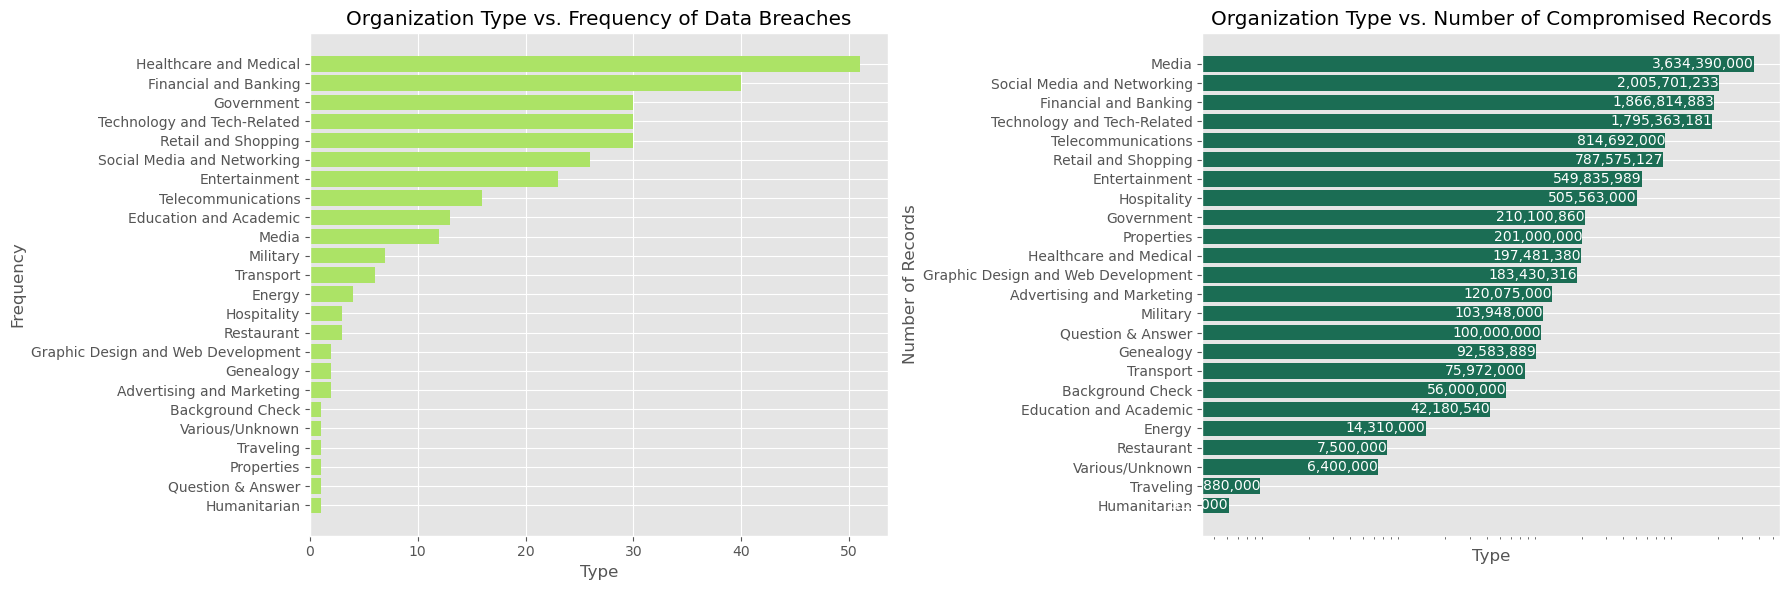

In [300]:
fig, (c1, c2) = plt.subplots(1, 2, figsize=(18,6))

# Frequency of Data Breaches by Organization Type
count_org = df.groupby('Organization type')['Organization type'].count().sort_values()

c1.barh(count_org.index, count_org, color="#ACE366")
c1.set_title('Organization Type vs. Frequency of Data Breaches')
c1.set_xlabel('Type')
c1.set_ylabel('Frequency')

# Number of Records Stolen Every Year
sum_org = df.groupby('Organization type')['Records'].sum().sort_values()

c2.barh(sum_org.index, sum_org, color="#1B6D54")
c2.set_title('Organization Type vs. Number of Compromised Records')
c2.set_xlabel('Type')
c2.set_ylabel('Number of Records')
c2.set_xscale('log')
c2.set_xticks([])
for index, value in enumerate(sum_org):
    c2.text(value, index, f'{int(value):,}', ha='right', va='center', color='#FFFFFF')

plt.tight_layout()
plt.show()

### Insights
1. **Healthcare and Financial companies tend to be the most vulnerable and sought after organizations for breaching.** It could be assumed that the reason why these two industries are the most targeted is because the data they possess, such as Social Security Numbers and bank account details are very valuable.
2. **There are of industries that have been impacted by breaches**, from Healthcare, to retail, to education, and even genealogy organizations. This goes to show that no industry is immune to data breaches and they all hold data that can be valuable.
3. **Media and Social Media organizations have the most compromised records of 3.6 billion,** despite not having as many data breach occurrences. Social media platforms like Twitter and Facebook are known to store extreme volumes of data, so each data breach occurrence can compromise almost billions of records.

## Method vs. Number of Records

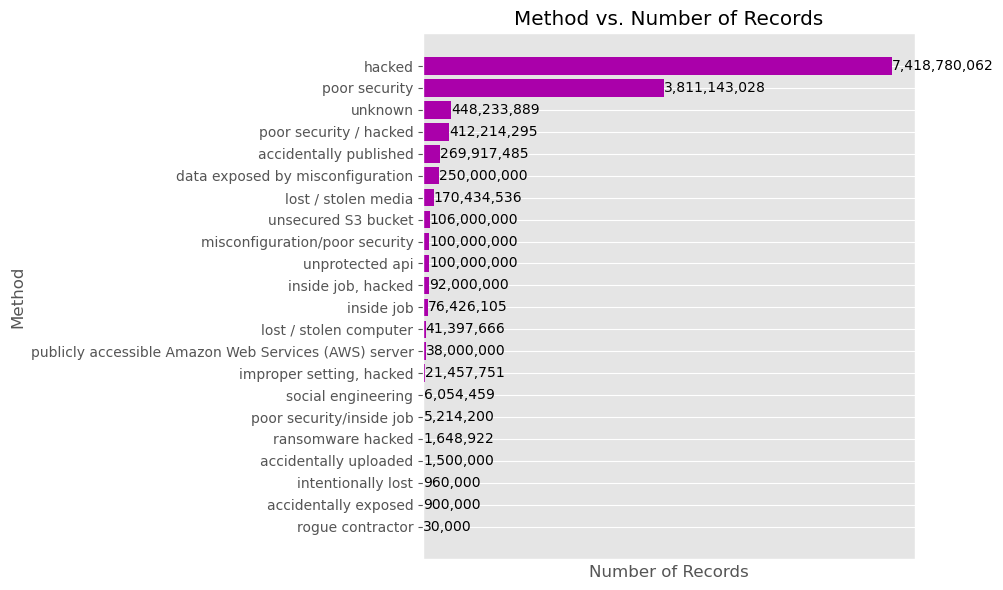

In [301]:
method_rec = df.groupby('Method')['Records'].sum().sort_values()

fig, m = plt.subplots(figsize=(10,6))
m.barh(method_rec.index, method_rec, color='#AA00AA')
m.set_xticks([])
for index, value in enumerate(method_rec):
    m.text(value, index, f'{int(value):,}', ha='left', va='center', color='#000000')
m.set_title('Method vs. Number of Records')
m.set_xlabel('Number of Records')
m.set_ylabel('Method')
    
plt.tight_layout()
plt.show()

### Insights
1. **Hacking is the most common method of data breaches and has contributed to the most records compromised**. Like mentioned before, this may be because hacking is one of the most efficient methods.
2. **Poor security leads to a high amount of records stolen.** This suggests that there are  organizations that are not well-equipped to handle serious security situations like data breaches.

## Year vs. Method
For simplicity, the top 10 most used methods will be included in this visualization.

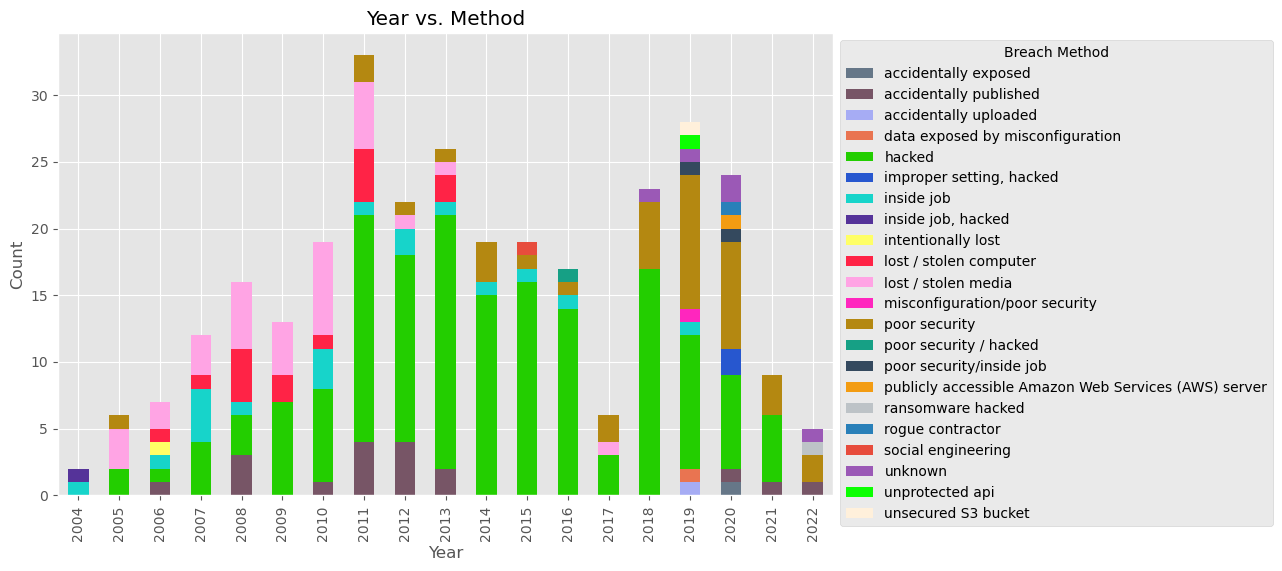

In [302]:
yr_method = df.groupby(['Year','Method'])['Method'].count().unstack()

method_colors = [
    '#667788', '#775566', '#a6acf4', '#e97451', '#23ce00', '#2757cf', 
    '#17d4ca', '#553399', '#ffff66', '#ff2346', '#ffa4e4', '#ff26be', 
    '#b48811', '#16A085', '#34495E', '#F39C12', '#BDC3C7', '#2980B9', 
    '#E74C3C', '#9B59B6', '#0bff01', '#fff0db', '#c04df9']
yr_method.plot(kind='bar', stacked=True, figsize=(10, 6), color=method_colors)
plt.title('Year vs. Method')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Breach Method', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### Insights
1. **Hacking is the most common and consistent method of data breaching from 2005-2021**. That is not a surprise since it is one of the most efficient way to breach companies and the fact that it is easier to stay anonymous while hacking. 
2. **2005-2013 shows a pattern of companies experiencing data breaches due to lost/stolen devices and media, but this method has decreased over time**. 2005-2011 was one of the most common ways to data breach and compromise sensitive data. The use of this method has  decreased over time likely because hacking became a much more convenient and effective approach than theft.
3. **2011-2022 shows a pattern of companies getting breached because of poor security**. This could suggest that security protocols become out-of-date over time as data breachers evolve their methods to work around them. Companies that do not keep up-to-date with their security run the risk of being breached.
4. **Besides hacking, 2007 also had the same amount of data breaches due to inside jobs.** It is important to take into consideration that 2007 was the beginning of the recession and people were losing or at risk of losing their jobs at that time, so occurrences of inside jobs became frequent.

## Method vs. Organization Type

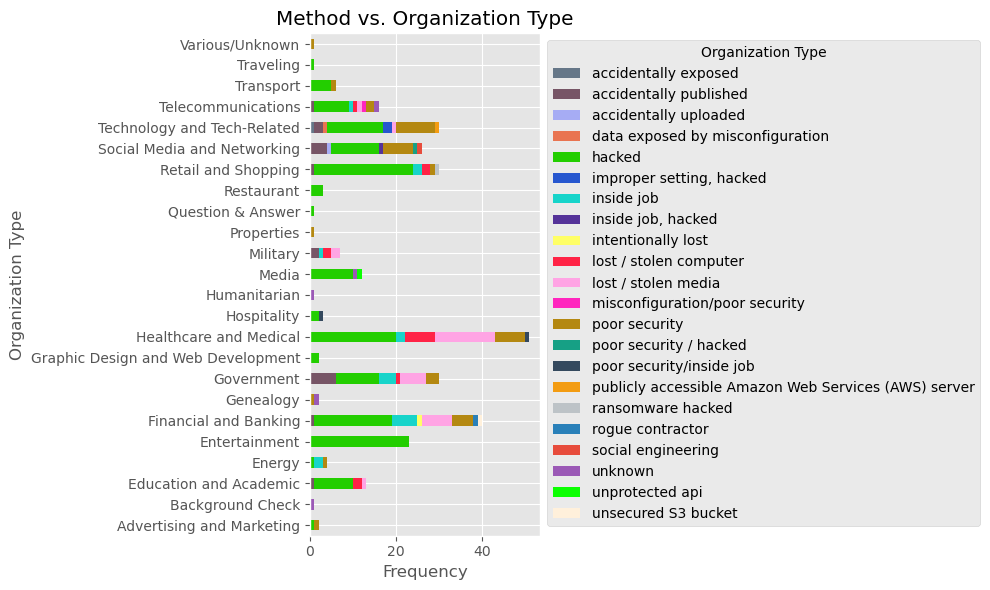

In [303]:
#yr_method.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
method_org = df.groupby(['Organization type','Method'])['Organization type'].count().unstack()
method_org.plot(kind='barh', stacked=True, figsize=(10, 6), color=method_colors)
plt.title('Method vs. Organization Type')
plt.xlabel('Frequency')
plt.ylabel('Organization Type')
plt.legend(title='Organization Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Insights
1. **One of the most common breach methods against Healthcare and Medical organizations is lost/stolen media and computers**. This [article](https://www.kiteworks.com/hipaa-compliance/lost-stolen-mobile-devices-leading-cause-of-healthcare-data-breaches/#:~:text=Lost%20and%20stolen%20mobile%20devices%20are%20a%20leading%20cause%20of,of%20mobile%20devices%20or%20files.) supports this insight.
2. **Besides hacking, the second reason why many data breaches for Technology companies occur is due to poor security.** 
3. **Besides hacking and stolen media, inside jobs are the third most common method for breaching Financial organizations.** 

# <span style="background-color: #ace9ec">  Step 4: Questions  </span>

## *How has the frequency of data breaches changed over time for the top 10 most breached organization types?*

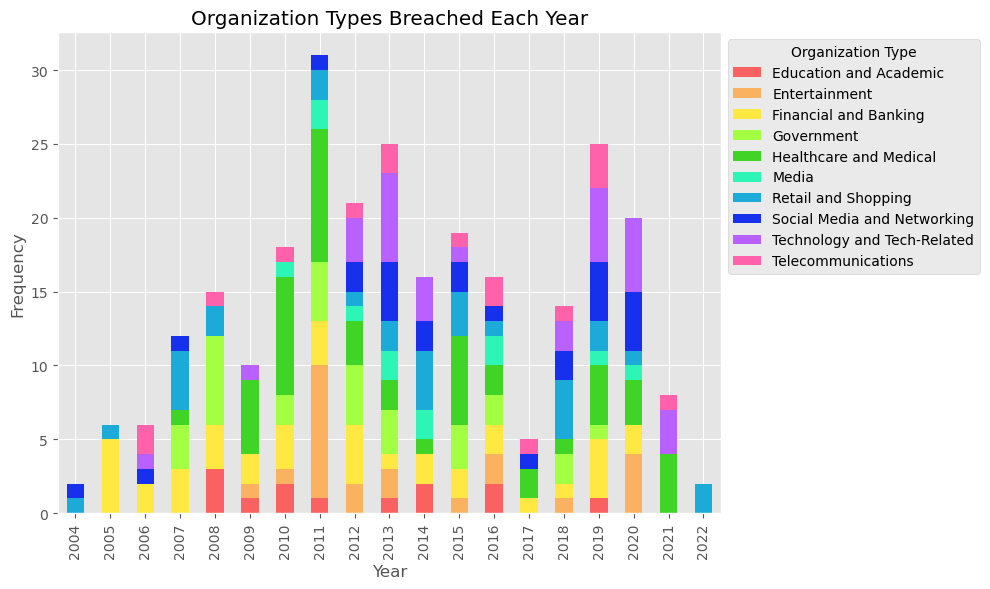

In [304]:
# 10 Organization types with the highest frequency of data breaches
top_org_types = count_org.sort_values(ascending=False).head(10).index.tolist()

top_org_types = count_org.sort_values(ascending=False).head(10).index.tolist()
filtered_df = df[df['Organization type'].isin(top_org_types)]
org_by_year = filtered_df.groupby(['Year', 'Organization type'])['Entity'].count().unstack()

# Chart
org_colors = ['#FA6161','#FAB261','#FFE842','#A3FF42','#40D426','#2CF5B5','#1CABD9','#1630ED','#B961FF','#FF61AB']

org_by_year.plot(kind='bar', stacked=True, figsize=(10, 6), color=org_colors)
plt.title('Organization Types Breached Each Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(title='Organization Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

### Insights
1. **Financial and Healthcare Organizations seem to be a consistent target of data breaches**. Healthcare organizations has had consistent data breaches from 2007-2021 (with the exception of 2008) and Financial organizations had consistent breaches from 2005-2020. Again, this could be due to how valuable their data is.
2. **Media organizations started getting breached in 2010 and persisted to 2020**. Most of the entities under this category are news sites such as Washington Post, Nippon Television, and Yahoo!. The 2010s had several major events such as Occupy Wall Street, the 2012, 2016, and 2020 Presidential Elections, the rise of terrorist attacks, and more. Perhaps these huge political and economic events caused an uptick of hacktivism.
3. **Entertainment suffered the worst data breaches in 2011.** Major companies like Sony and Steam suffered huge data breaches this year. 

In [305]:
eb_filter = df[(df['Organization type'] == 'Entertainment') & (df['Year'] == 2011)]
eb_filter.sort_values(by='Records', ascending=False)

,Id,Entity,Year,Records,Organization type,Method
218,252,Sony PlayStation Network,2011,77000000,Entertainment,hacked
227,262,Steam,2011,35000000,Entertainment,hacked
216,249,Sony Online Entertainment,2011,24600000,Entertainment,hacked
181,207,Nexon Korea Corp,2011,13200000,Entertainment,hacked
53,61,"Chinese gaming websites (three: Duowan, 7K7K, ...",2011,10000000,Entertainment,hacked
210,241,Sega,2011,1290755,Entertainment,hacked
217,250,Sony Pictures,2011,1000000,Entertainment,hacked
34,39,Bethesda Game Studios,2011,200000,Entertainment,hacked
292,338,Writerspace.com,2011,62000,Entertainment,hacked


## *What are the organizations that have had the most data breaches? Identify what methods were used on the organization with the highest breaches.*

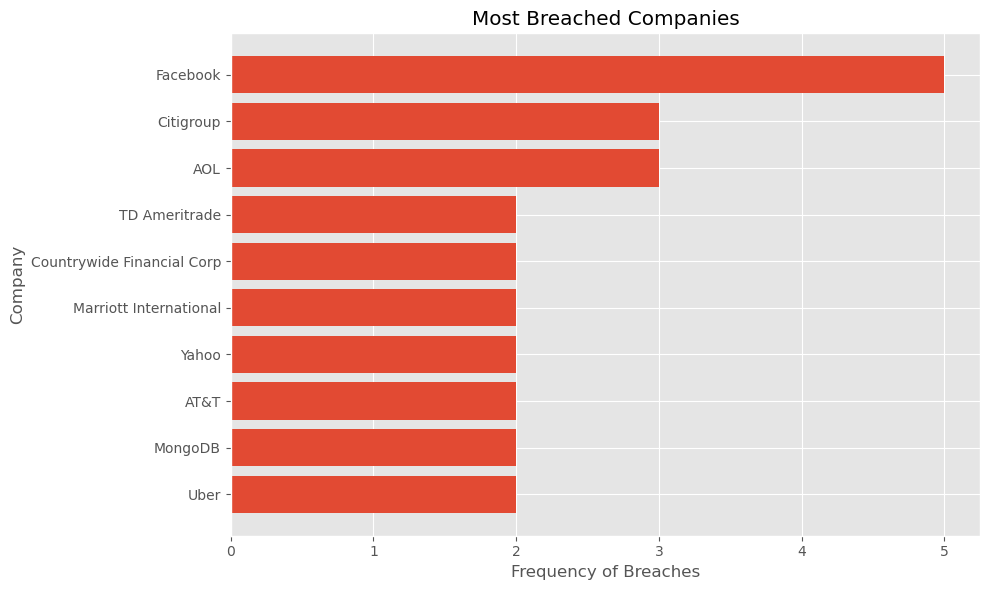

In [306]:
top_orgs = df.groupby('Entity')['Entity'].count().sort_values(ascending=True)
top_orgs = top_orgs.tail(10)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_orgs.index, top_orgs.values)
ax.set_title('Most Breached Companies')
ax.set_xlabel('Frequency of Breaches')
ax.set_ylabel('Company')

plt.tight_layout()
plt.show()

**Facebook leads with the most breaches. Lets take a look at the data breach methods used:**

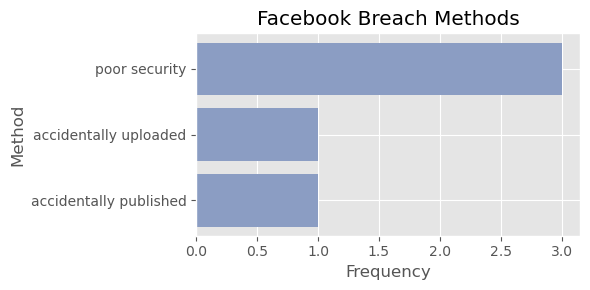

In [307]:
fb_filter = df[df['Entity'] == 'Facebook']
fb_methods = fb_filter.groupby('Method')['Method'].count()
fb_methods

fig, fb = plt.subplots(figsize=(6,3))
fb.barh(fb_methods.index, fb_methods.values, color='#8b9dc3')
fb.set_title('Facebook Breach Methods')
fb.set_xlabel('Frequency')
fb.set_ylabel('Method')

plt.tight_layout()
plt.show()

### Insights
1. **Facebook had the most data breaches, having five data breaches throughout 2004-2022.** Three of the data breaches occurred in the same year, 2019.
2. **The most commonly used method against Facebook is poor security.** This aligns with articles in 2019 and 2019 as they have been called out for critical security flaws that led to these breaches.

Articles:
- https://www.vox.com/2018/9/28/17914598/facebook-new-hack-data-breach-50-million
- https://www.theguardian.com/technology/2018/sep/28/facebook-50-million-user-accounts-security-berach
- https://www.engadget.com/facebook-533-million-user-personal-data-leak-180156777.html

## *Which Organization types have the most data breaches due to inside jobs?*

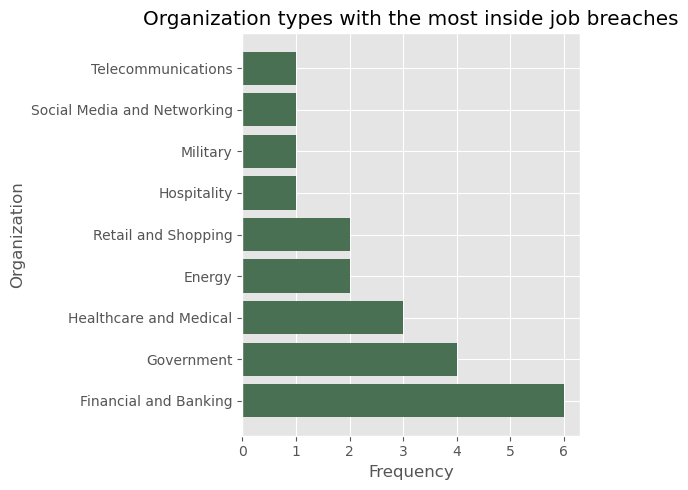

In [308]:
org_ij_filter = df[(df['Method'] == 'inside job') | (df['Method'] == 'inside job, hacked') | (df['Method'] == 'poor security/inside job')]
org_ij = org_ij_filter.groupby('Organization type')['Method'].count().sort_values(ascending=False)

fig, ij = plt.subplots(figsize=(6,5))
ij.barh(org_ij.index, org_ij.values, color='#4a7054')
ij.set_title('Organization types with the most inside job breaches')
ij.set_xlabel('Frequency')
ij.set_ylabel('Organization')

plt.tight_layout()
plt.show()

## Insights
- It was already pointed out that Financial and Banking organizations are more likely to be breached due to inside jobs.
1. **Government entities are more likely to be breached due to inside jobs**.